In [2]:
import os
print(os.getcwd())
#os.chdir('..')
os.chdir('d:/Users/mokky/Documents/GitHub/NUS-ISS/IS02_PT_Capstone_Human_Re-ID')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\NUS-ISS\IS02_PT_Capstone_Human_Re-ID\notebooks
d:\Users\mokky\Documents\GitHub\NUS-ISS\IS02_PT_Capstone_Human_Re-ID


In [74]:
import sqlite3
from src.database.database import ImageDB
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import io
import base64


In [4]:
imagedb = ImageDB()
imagedb.db_path = 'database/Image.db'

print(imagedb.table_name)


VectorKB_Table


In [17]:
db_path = 'database/Image.db'
query = "SELECT name FROM sqlite_master WHERE type='table'"
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)


              name
0   VectorKB_Table
1  Inference_Table


                  img_id  cam_id                  timestamp track_id  \
0   2_95TK_20210403T2352       2 2021-04-03 23:52:40.459463     95TK   
1   2_95TK_20210403T2352       2 2021-04-03 23:52:44.003984     95TK   
2   2_95TK_20210403T2352       2 2021-04-03 23:52:47.391407     95TK   
3   2_95TK_20210403T2352       2 2021-04-03 23:52:50.845218     95TK   
4   2_95TK_20210403T2352       2 2021-04-03 23:52:54.261435     95TK   
5   2_95TK_20210403T2352       2 2021-04-03 23:52:58.007687     95TK   
6   2_95TK_20210403T2353       2 2021-04-03 23:53:01.389808     95TK   
7   2_95TK_20210403T2353       2 2021-04-03 23:53:05.307731     95TK   
8   2_95TK_20210403T2353       2 2021-04-03 23:53:08.715368     95TK   
9   2_95TK_20210403T2353       2 2021-04-03 23:53:12.278328     95TK   
10  2_95TK_20210403T2353       2 2021-04-03 23:53:15.863645     95TK   
11  2_95TK_20210403T2353       2 2021-04-03 23:53:19.422490     95TK   
12  2_95TK_20210403T2353       2 2021-04-03 23:53:22.996751     

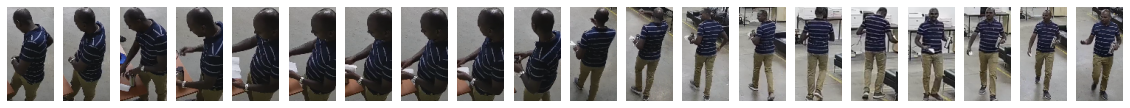

In [63]:
db_path = 'database/Image.db'
table_name = 'VectorKB_Table'
query = f'SELECT * FROM {table_name} ORDER BY cam_id, img_id LIMIT 20'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                            sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)
img = qry_results['patch_np'].iloc[0]
print(type(img), img.dtype)
fig, axs = plt.subplots(1, len(qry_results), figsize=(20, 15))
for i in range(len(qry_results)):
    img = qry_results['patch_np'].iloc[i]
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
plt.show()


In [38]:
db_path = 'database/Image.db'
table_name = 'Inference_Table'
query = f'SELECT * FROM {table_name} LIMIT 1'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)



Empty DataFrame
Columns: [img_id, cam_id, timestamp, track_id]
Index: []


In [20]:
db_path = 'database/reid_db.db'
query = "SELECT name FROM sqlite_master WHERE type='table'"
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)


              name
0  sqlite_sequence
1      human_table
2   vectorkb_table
3  inference_table


In [24]:
db_path = 'database/reid_db.db'
table_name = 'VectorKB_Table'
query = f'SELECT * FROM {table_name} LIMIT 1'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)


                  img_id                                           img_path  \
0  -1_c1s1_000401_03.jpg  ../resource/market1501/bounding_box_test/-1_c1...   

                                                 img  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...   

                                       vector_tensor      create_datetime  
0  b'\x80\x03ctorch._utils\n_rebuild_tensor_v2\nq...  2021-04-02 16:06:22  


In [44]:
db_path = 'database/reid_db.db'
table_name = 'human_table'
query = f'SELECT * FROM {table_name} LIMIT 10'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)


                  img_id human_id   inference_datetime
0  -1_c1s1_000401_03.jpg       -1  2021-04-05 14:57:13
1  -1_c1s1_000451_04.jpg       -1  2021-04-05 14:57:13
2  -1_c1s1_001351_04.jpg       -1  2021-04-05 14:57:13
3  -1_c1s1_001376_05.jpg       -1  2021-04-05 14:57:13
4  -1_c1s1_011251_02.jpg       -1  2021-04-05 14:57:13
5  -1_c1s1_011276_03.jpg       -1  2021-04-05 14:57:13
6  -1_c1s1_011426_05.jpg       -1  2021-04-05 14:57:13
7  -1_c1s1_011526_06.jpg       -1  2021-04-05 14:57:13
8  -1_c1s1_013476_02.jpg       -1  2021-04-05 14:57:13
9  -1_c1s1_014251_02.jpg       -1  2021-04-05 14:57:13


   inference_id             query_img_id query_img           match_1_img_id  \
0          3430  0001_c1s1_001051_00.jpg      None  0001_c1s1_001051_03.jpg   
1          3431  0001_c2s1_000301_00.jpg      None    -1_c2s1_000351_02.jpg   
2          3432  0001_c3s1_000551_00.jpg      None  0001_c3s1_000551_03.jpg   
3          3433  0001_c4s6_000810_00.jpg      None  0001_c4s6_000810_06.jpg   
4          3434  0001_c5s1_001426_00.jpg      None  0001_c5s1_001426_03.jpg   
5          3435  0001_c6s1_009601_00.jpg      None  0001_c6s1_009701_02.jpg   
6          3436  0003_c1s6_015971_00.jpg      None  0003_c1s6_015971_02.jpg   
7          3437  0003_c3s3_064744_00.jpg      None  0003_c3s3_064744_03.jpg   
8          3438  0003_c4s6_015641_00.jpg      None  0003_c4s6_015641_01.jpg   
9          3439  0003_c5s3_065187_00.jpg      None  0003_c5s3_065187_01.jpg   

                                         match_1_img  match_1_dist  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...      0.

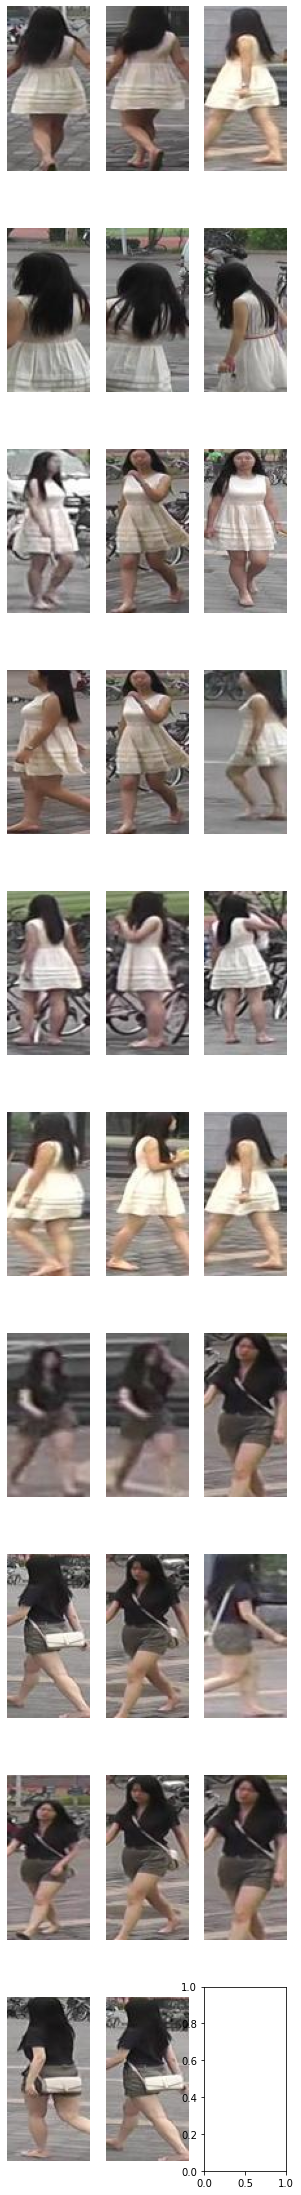

In [100]:
db_path = 'database/reid_db.db'
table_name = 'inference_table'
query = f'SELECT * FROM {table_name} LIMIT 10'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)
print(type(qry_results['match_1_img'].iloc[0]))
img = cv2.imdecode(np.frombuffer(qry_results['match_1_img'].iloc[0], np.uint8), cv2.IMREAD_ANYCOLOR)
print(type(img), img.shape)
fig, axs = plt.subplots(len(qry_results), 3, figsize=(5, 40))
for i in range(len(qry_results)):
    for j in range(3):
        img_data = qry_results[f'match_{j+1}_img'].iloc[i]
        if img_data is not None:
            img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
            axs[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[i,j].axis('off')
plt.show()


In [43]:
db_path = 'database/reid_db.db'
table_name = 'sqlite_sequence'
query = f'SELECT * FROM {table_name}'
conn = sqlite3.connect(db_path, detect_types=sqlite3.PARSE_DECLTYPES |
                       sqlite3.PARSE_COLNAMES)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
qry_results = pd.DataFrame(cursor.fetchall(), columns=column_names)
print(qry_results)


              name   seq
0  inference_table  7887


In [150]:
%load_ext autoreload
%autoreload 2
from src.database.database import DbQuery

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
imagedb = DbQuery(db_path='database/Image.db')
query = "SELECT name FROM sqlite_master WHERE type='table'"
qry_results = imagedb.query_data(query)
print(qry_results)

              name
0   VectorKB_Table
1  Inference_Table


Index(['img_id', 'cam_id', 'timestamp', 'track_id', 'patch_img', 'patch_np',
       'patch_bbox', 'frame_num'],
      dtype='object')
<class 'numpy.ndarray'> uint8


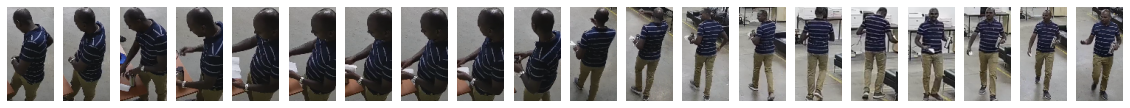

In [156]:
query = 'SELECT * FROM VectorKB_Table ORDER BY cam_id, img_id LIMIT 20'
qry_results = imagedb.query_data(query)
print(qry_results.columns)
img = qry_results['patch_np'].iloc[0]
print(type(img), img.dtype)
fig, axs = plt.subplots(1, len(qry_results), figsize=(20, 15))
for i in range(len(qry_results)):
    img = qry_results['patch_np'].iloc[i]
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
plt.show()


In [157]:
query = 'SELECT * FROM Inference_Table LIMIT 1'
qry_results = imagedb.query_data(query)
print(qry_results)


Empty DataFrame
Columns: [img_id, cam_id, timestamp, track_id]
Index: []


In [158]:
reiddb = DbQuery(db_path='database/reid_db.db')
query = "SELECT name FROM sqlite_master WHERE type='table'"
qry_results = reiddb.query_data(query)
print(qry_results)


              name
0  sqlite_sequence
1      human_table
2   vectorkb_table
3  inference_table


Index(['img_id', 'img_path', 'img', 'vector_tensor', 'create_datetime'], dtype='object')
<class 'bytes'>
<class 'numpy.ndarray'> (128, 64, 3)


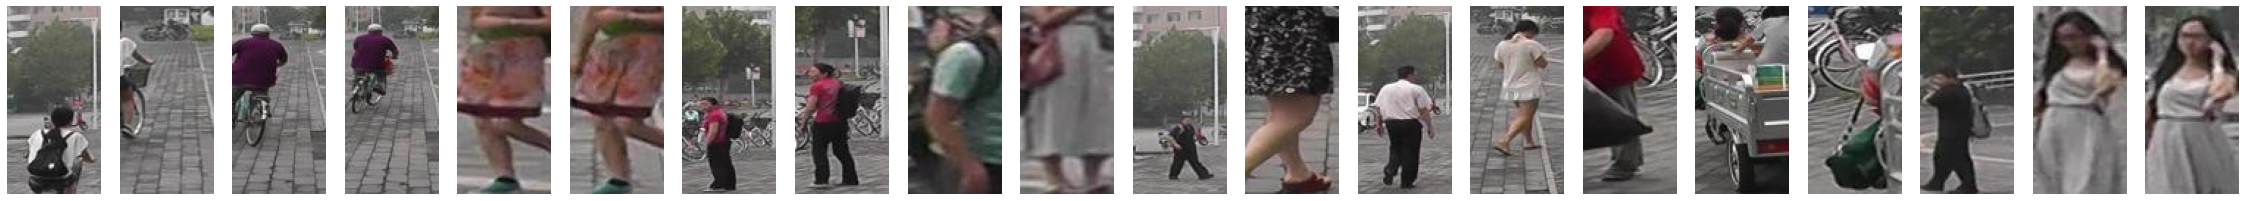

In [172]:
query = 'SELECT * FROM vectorkb_table ORDER BY img_id LIMIT 20'
qry_results = reiddb.query_data(query)
print(qry_results.columns)
print(type(qry_results['img'].iloc[0]))
img = cv2.imdecode(np.frombuffer(
    qry_results['img'].iloc[0], np.uint8), cv2.IMREAD_ANYCOLOR)
print(type(img), img.shape)
fig, axs = plt.subplots(1, len(qry_results), figsize=(40, 40))
for i in range(len(qry_results)):
    img_data = qry_results[f'img'].iloc[i]
    if img_data is not None:
        img = cv2.imdecode(np.frombuffer(
            img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
plt.show()


In [161]:
query = 'SELECT * FROM human_table LIMIT 10'
qry_results = reiddb.query_data(query)
print(qry_results)


                  img_id human_id   inference_datetime
0  -1_c1s1_000401_03.jpg       -1  2021-04-05 14:57:13
1  -1_c1s1_000451_04.jpg       -1  2021-04-05 14:57:13
2  -1_c1s1_001351_04.jpg       -1  2021-04-05 14:57:13
3  -1_c1s1_001376_05.jpg       -1  2021-04-05 14:57:13
4  -1_c1s1_011251_02.jpg       -1  2021-04-05 14:57:13
5  -1_c1s1_011276_03.jpg       -1  2021-04-05 14:57:13
6  -1_c1s1_011426_05.jpg       -1  2021-04-05 14:57:13
7  -1_c1s1_011526_06.jpg       -1  2021-04-05 14:57:13
8  -1_c1s1_013476_02.jpg       -1  2021-04-05 14:57:13
9  -1_c1s1_014251_02.jpg       -1  2021-04-05 14:57:13


Index(['inference_id', 'query_img_id', 'query_img', 'match_1_img_id',
       'match_1_img', 'match_1_dist', 'match_2_img_id', 'match_2_img',
       'match_2_dist', 'match_3_img_id', 'match_3_img', 'match_3_dist',
       'inference_datetime'],
      dtype='object')
<class 'bytes'>
<class 'numpy.ndarray'> (128, 64, 3)


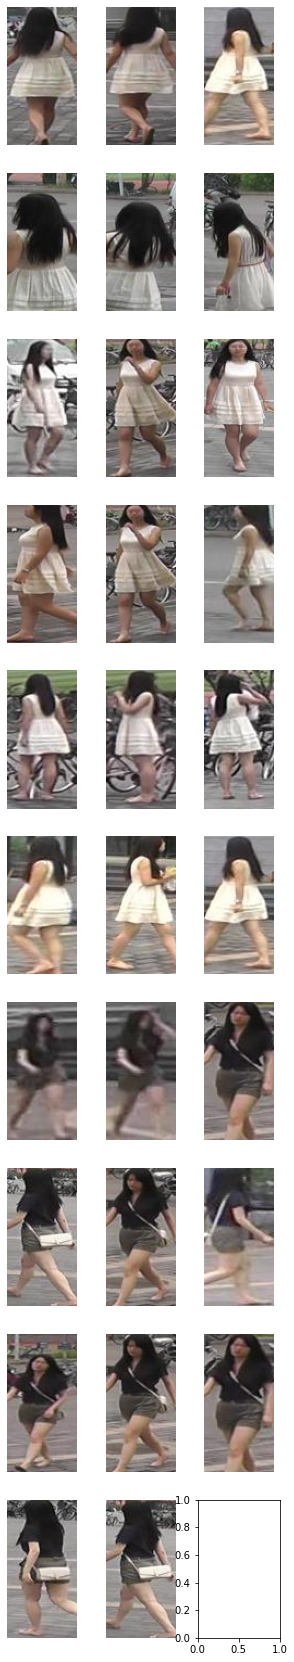

In [175]:
query = 'SELECT * FROM inference_table LIMIT 10'
qry_results = reiddb.query_data(query)
print(qry_results.columns)
print(type(qry_results['match_1_img'].iloc[0]))
img = cv2.imdecode(np.frombuffer(
    qry_results['match_1_img'].iloc[0], np.uint8), cv2.IMREAD_ANYCOLOR)
print(type(img), img.shape)
fig, axs = plt.subplots(len(qry_results), 3, figsize=(5, 30))
for i in range(len(qry_results)):
    for j in range(3):
        img_data = qry_results[f'match_{j+1}_img'].iloc[i]
        if img_data is not None:
            img = cv2.imdecode(np.frombuffer(
                img_data, np.uint8), cv2.IMREAD_ANYCOLOR)
            axs[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[i, j].axis('off')
plt.show()
